# Maximizing Revenue For Cab Drivers-Through Payment Type

## **Problem Statement**

In the fast-paced taxi booking sector, maximizing revenue is crucial for long-term success and driver happiness. Our goal is to leverage data-driven insights to optimize revenue streams for taxi drivers. To achieve this, our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

## **Objective**

The primary objective of this project is to conduct an A/B test to examine the relationship between total fare and the method of payment. We will employ Python hypothesis testing and descriptive statistics to extract valuable information that can help taxi drivers generate more revenue. Specifically, we aim to identify if there is a significant difference in fares between those who pay with credit cards and those who pay with cash.

## **Research Question**

Is there a correlation between total fare amount and payment type? Additionally, can we strategically nudge customers towards payment methods that generate higher revenue for drivers without compromising customer experience?


### Importing Essential Libraries 

In [1]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
df = pd.read_csv('C:/Users/hi/Downloads/trip_data_2020.csv')

### Exploring The Data Structure

In [3]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.5,0.5,0.00,0.0,0.3,4.80,0.0
5,2.0,2020-01-01 00:09:44,2020-01-01 00:10:37,1.0,0.03,1.0,N,7,193,2.0,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0
6,2.0,2020-01-01 00:39:25,2020-01-01 00:39:29,1.0,0.00,1.0,N,193,193,1.0,2.50,0.5,0.5,0.01,0.0,0.3,3.81,0.0
7,2.0,2019-12-18 15:27:49,2019-12-18 15:28:59,1.0,0.00,5.0,N,193,193,1.0,0.01,0.0,0.0,0.00,0.0,0.3,2.81,2.5
8,2.0,2019-12-18 15:30:35,2019-12-18 15:31:35,4.0,0.00,1.0,N,193,193,1.0,2.50,0.5,0.5,0.00,0.0,0.3,6.30,2.5
9,1.0,2020-01-01 00:29:01,2020-01-01 00:40:28,2.0,0.70,1.0,N,246,48,1.0,8.00,3.0,0.5,2.35,0.0,0.3,14.15,2.5


In [4]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.0,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.0,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.0,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.0,0.00,0.3,30.22,0.0
6405007,NaN,2020-01-31 22:44:00,2020-01-31 23:06:00,NaN,11.60,NaN,NaN,179,205,NaN,54.56,2.75,0.5,0.0,0.00,0.3,58.11,0.0


## Performing Exploratory Data Analysis and visualizing Data

In [5]:
# Shape of the Data
print(f'The shape of the Data : {df.shape}')

The shape of the Data : (6405008, 18)


In [6]:
#checking the data types of the columns
print(df.dtypes)

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object


In [7]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [8]:
#Checking for the datetime conversion
print(df.dtypes)

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object


In [9]:
df['duration'] = df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,0 days 00:04:48
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,0 days 00:07:25
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,0 days 00:06:11
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,0 days 00:04:51
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,0 days 00:02:18


In [10]:
#Converting the duration to minutes 
df['duration'] = df['duration'].dt.total_seconds()/60
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


In [11]:
#Filtering/Extracting the required Data
df = df[['passenger_count','trip_distance','payment_type','fare_amount','duration']]

In [12]:
df.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.2,1.0,6.0,4.800000
1,1.0,1.2,1.0,7.0,7.416667
2,1.0,0.6,1.0,6.0,6.183333
3,1.0,0.8,1.0,5.5,4.850000
4,1.0,0.0,2.0,3.5,2.300000


In [13]:
df.tail()

,passenger_count,trip_distance,payment_type,fare_amount,duration
6405003,NaN,3.24,NaN,17.59,31.000000
6405004,NaN,22.13,NaN,46.67,76.000000
6405005,NaN,10.51,NaN,48.85,27.833333
6405006,NaN,5.49,NaN,27.17,22.650000
6405007,NaN,11.60,NaN,54.56,22.000000


In [14]:
print(f'Shape Of the filtered Data: {df.shape}')

Shape Of the filtered Data: (6405008, 5)


__We can see quite a number of missing values. Lets check for them.__

In [15]:
#Checking for missing values
df.isnull().sum()

passenger_count    65441
trip_distance          0
payment_type       65441
fare_amount            0
duration               0
dtype: int64

Lets check for the missing values perentage contribution to the dataset.

In [16]:
perc_contribution = (65441/len(df))*100
print(f'Missing values contribute to {perc_contribution}% of Data')

Missing values contribute to 1.021716132126611% of Data


Since this missing data contibutes to about roughly one percent of the dataset, we can drop them.

In [17]:
#Dropping the missing values
df.dropna(inplace=True)

In [18]:
#Checking if the data drop worked
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.20,1.0,6.0,4.800000
1,1.0,1.20,1.0,7.0,7.416667
2,1.0,0.60,1.0,6.0,6.183333
3,1.0,0.80,1.0,5.5,4.850000
4,1.0,0.00,2.0,3.5,2.300000
...,...,...,...,...,...
6339562,1.0,2.10,1.0,11.0,14.233333
6339563,1.0,2.13,1.0,13.0,19.000000
6339564,1.0,2.55,1.0,12.5,16.283333
6339565,1.0,1.61,2.0,8.5,9.633333


We have successfully dropped the missing values.  

We can also see that the __'passenger count'__ and __'payment type'__ column are present as __float__ datatype. Lets convert it to __int64__

In [19]:
df.dtypes

passenger_count    float64
trip_distance      float64
payment_type       float64
fare_amount        float64
duration           float64
dtype: object

In [20]:
#Converting the datatypes
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [21]:
df.dtypes

passenger_count      int64
trip_distance      float64
payment_type         int64
fare_amount        float64
duration           float64
dtype: object

We have a succesful conversion of the required datatypes.

__Checking for duplicates__

In [22]:
df[df.duplicated()]

,passenger_count,trip_distance,payment_type,fare_amount,duration
2056,1,0.00,2,7.0,0.000000
2441,1,0.00,1,52.0,0.200000
2446,2,1.70,1,9.5,13.066667
2465,1,0.40,1,4.0,3.083333
3344,1,1.20,1,6.0,5.350000
...,...,...,...,...,...
6339558,1,1.63,2,8.0,8.800000
6339559,1,1.81,1,8.5,8.016667
6339560,1,0.98,2,6.5,6.900000
6339562,1,2.10,1,11.0,14.233333


We can see that we have a lot bof duplicate values out here. Since duplicate values dont contribute to the Data Analysis process. We are going to drop them.

In [23]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)

In [24]:
df.shape

(3007861, 5)

We have succesfully dropped the duplicates.

In [25]:
#Checking for the contribution of passenger count and payment type to data
df['passenger_count'].value_counts(normalize=True)

1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: passenger_count, dtype: float64

In [26]:
df['payment_type'].value_counts(normalize=True)

1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: payment_type, dtype: float64

In [27]:
#Filtering data
#Taking passenger count upto 5
df = df[(df['passenger_count']>0) & (df['passenger_count']<6)]
#Taking for payment types 1 and 2 which are encoded values for credit card and cash respectively
df = df[df['payment_type']<3]

In [28]:
df.shape

(2780283, 5)

In [29]:
df['payment_type'].replace([1,2],['Cred_Card','Cash'],inplace=True)

In [30]:
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.20,Cred_Card,6.0,4.800000
1,1,1.20,Cred_Card,7.0,7.416667
2,1,0.60,Cred_Card,6.0,6.183333
3,1,0.80,Cred_Card,5.5,4.850000
4,1,0.00,Cash,3.5,2.300000
...,...,...,...,...,...
6339555,3,2.09,Cred_Card,10.0,14.800000
6339561,1,4.11,Cred_Card,17.5,21.500000
6339563,1,2.13,Cred_Card,13.0,19.000000
6339564,1,2.55,Cred_Card,12.5,16.283333


The data is now all preprocessed.

Let us check the summary statistics

In [31]:
df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,4.536729e+00,1.780567e+01,2.415478e+01
std,1.176652e+00,4.895890e+00,1.506997e+01,9.260031e+01
min,1.000000e+00,-2.218000e+01,-5.000000e+02,-2.770367e+03
25%,1.000000e+00,1.500000e+00,9.000000e+00,9.883333e+00
50%,1.000000e+00,2.730000e+00,1.300000e+01,1.573333e+01
75%,2.000000e+00,5.470000e+00,2.100000e+01,2.336667e+01
max,5.000000e+00,2.628800e+02,4.265000e+03,8.525117e+03


We can see the minimum values in negative.

In [32]:
df = df[df['trip_distance']>0]
df = df[df['fare_amount']>0]
df = df[df['duration']>0]

In [33]:
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.20,Cred_Card,6.0,4.800000
1,1,1.20,Cred_Card,7.0,7.416667
2,1,0.60,Cred_Card,6.0,6.183333
3,1,0.80,Cred_Card,5.5,4.850000
5,1,0.03,Cash,2.5,0.883333
...,...,...,...,...,...
6339550,4,2.40,Cred_Card,10.5,12.383333
6339555,3,2.09,Cred_Card,10.0,14.800000
6339561,1,4.11,Cred_Card,17.5,21.500000
6339563,1,2.13,Cred_Card,13.0,19.000000


In [34]:
df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,4.583313e+00,1.766835e+01,2.418261e+01
std,1.179440e+00,4.897806e+00,1.447531e+01,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,1.530000e+00,9.000000e+00,9.950000e+00
50%,1.000000e+00,2.770000e+00,1.300000e+01,1.575000e+01
75%,2.000000e+00,5.500000e+00,2.100000e+01,2.333333e+01
max,5.000000e+00,2.628800e+02,4.265000e+03,8.525117e+03


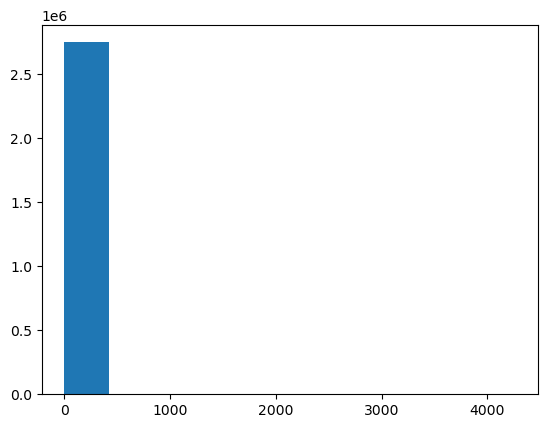

In [35]:
#Visualizing the data for outliers

plt.hist(df['fare_amount'])
plt.show()

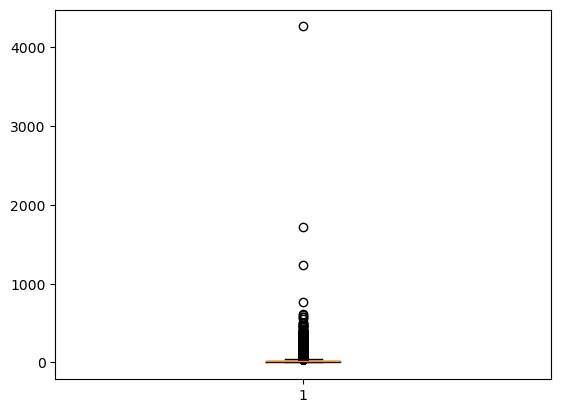

In [36]:
plt.boxplot(df['fare_amount'])
plt.show()

We can see there are a heavy number of outliers present and the data is not at all normally distributed.

In [37]:
#Detecting outliers using InterQuartile range
for cols in ['trip_distance','fare_amount','duration']:
    Q3 = df[cols].quantile(0.75)
    Q1 = df[cols].quantile(0.25)
    IQR = Q3 - Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    
    df = df[(df[cols]>=lower_bound) & (df[cols]<=upper_bound)]

In [38]:
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.20,Cred_Card,6.0,4.800000
1,1,1.20,Cred_Card,7.0,7.416667
2,1,0.60,Cred_Card,6.0,6.183333
3,1,0.80,Cred_Card,5.5,4.850000
5,1,0.03,Cash,2.5,0.883333
...,...,...,...,...,...
6339550,4,2.40,Cred_Card,10.5,12.383333
6339555,3,2.09,Cred_Card,10.0,14.800000
6339561,1,4.11,Cred_Card,17.5,21.500000
6339563,1,2.13,Cred_Card,13.0,19.000000


As the data is preprocessed we are all set to visualize the data for further Analysis.

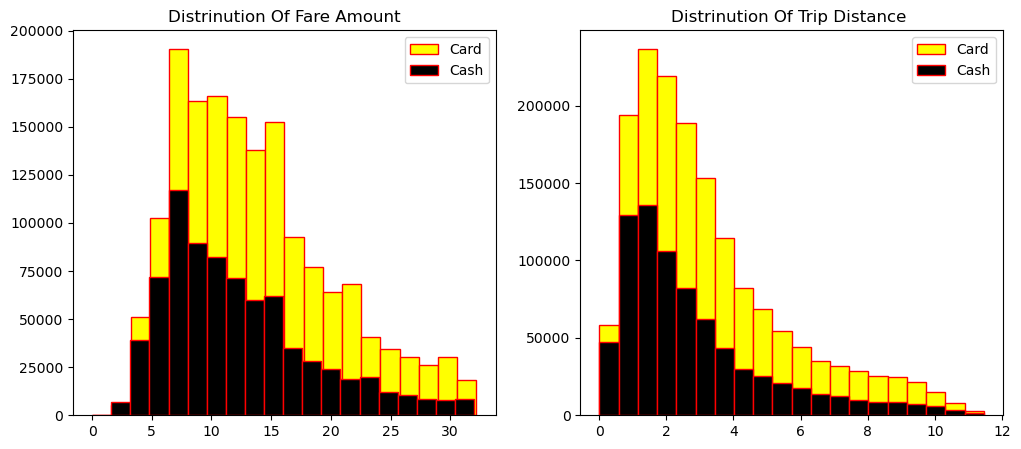

In [39]:
# Visualizing the data
plt.figure(figsize=(12,5))
#Fare Amount Distribution
plt.subplot(1,2,1)
plt.title('Distrinution Of Fare Amount')
plt.hist(df[df['payment_type']=='Cred_Card']['fare_amount'], histtype='barstacked', bins=20, color='#FFFF00', edgecolor='red',label='Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'], histtype='barstacked', bins=20, color='#000000', edgecolor='red',label='Cash')
plt.legend()
#Trip Distance Distribution
plt.subplot(1,2,2)
plt.title('Distrinution Of Trip Distance ')
plt.hist(df[df['payment_type']=='Cred_Card']['trip_distance'], histtype='barstacked', bins=20, color='#FFFF00', edgecolor='red',label='Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'], histtype='barstacked', bins=20, color='#000000', edgecolor='red',label='Cash')
plt.legend()
plt.show()

In [40]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Cash           12.250209  6.246104      2.803716  2.231871
Cred_Card      13.701903  6.506356      3.230729  2.320528

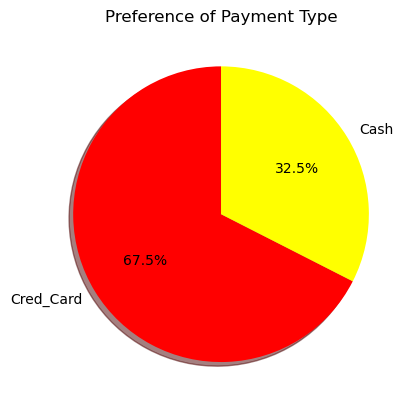

In [41]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True), labels = df['payment_type'].value_counts().index, startangle=90,shadow= True, autopct='%1.1f%%'
        ,colors=['Red','Yellow'])
plt.show()

Now we find out the passenger count and the distribution of the payment method they prefer.

In [42]:
df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

passenger_count
payment_type passenger_count                 
Cash         1                         476475
             2                         159243
             3                          55491
             4                          33208
             5                          48469
Cred_Card    1                         953075
             2                         336560
             3                         124662
             4                          64752
             5                         126283

Creating a new dataframe for further analysis.

In [43]:
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns ={'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace=True)

In [44]:
passenger_count

,payment_type,passenger_count,count
0,Cash,1,476475
1,Cash,2,159243
2,Cash,3,55491
3,Cash,4,33208
4,Cash,5,48469
5,Cred_Card,1,953075
6,Cred_Card,2,336560
7,Cred_Card,3,124662
8,Cred_Card,4,64752
9,Cred_Card,5,126283


In [45]:
passenger_count['Percentage'] = (passenger_count['count']/passenger_count['count'].sum())*100

In [46]:
passenger_count

,payment_type,passenger_count,count,Percentage
0,Cash,1,476475,20.034959
1,Cash,2,159243,6.695896
2,Cash,3,55491,2.333302
3,Cash,4,33208,1.396340
4,Cash,5,48469,2.038039
5,Cred_Card,1,953075,40.075174
6,Cred_Card,2,336560,14.151772
7,Cred_Card,3,124662,5.241824
8,Cred_Card,4,64752,2.722711
9,Cred_Card,5,126283,5.309984


Creating a custom DataFrame for the visualization

In [47]:
chart_df = pd.DataFrame(columns=['Payment_Type',1,2,3,4,5])
chart_df['Payment_Type']=['Cred_Card','Cash']
chart_df.iloc[0,1:]=passenger_count.iloc[0:5,-1]
chart_df.iloc[1,1:]=passenger_count.iloc[5:,-1]
chart_df

,Payment_Type,1,2,3,4,5
0,Cred_Card,20.034959,6.695896,2.333302,1.39634,2.038039
1,Cash,40.075174,14.151772,5.241824,2.722711,5.309984


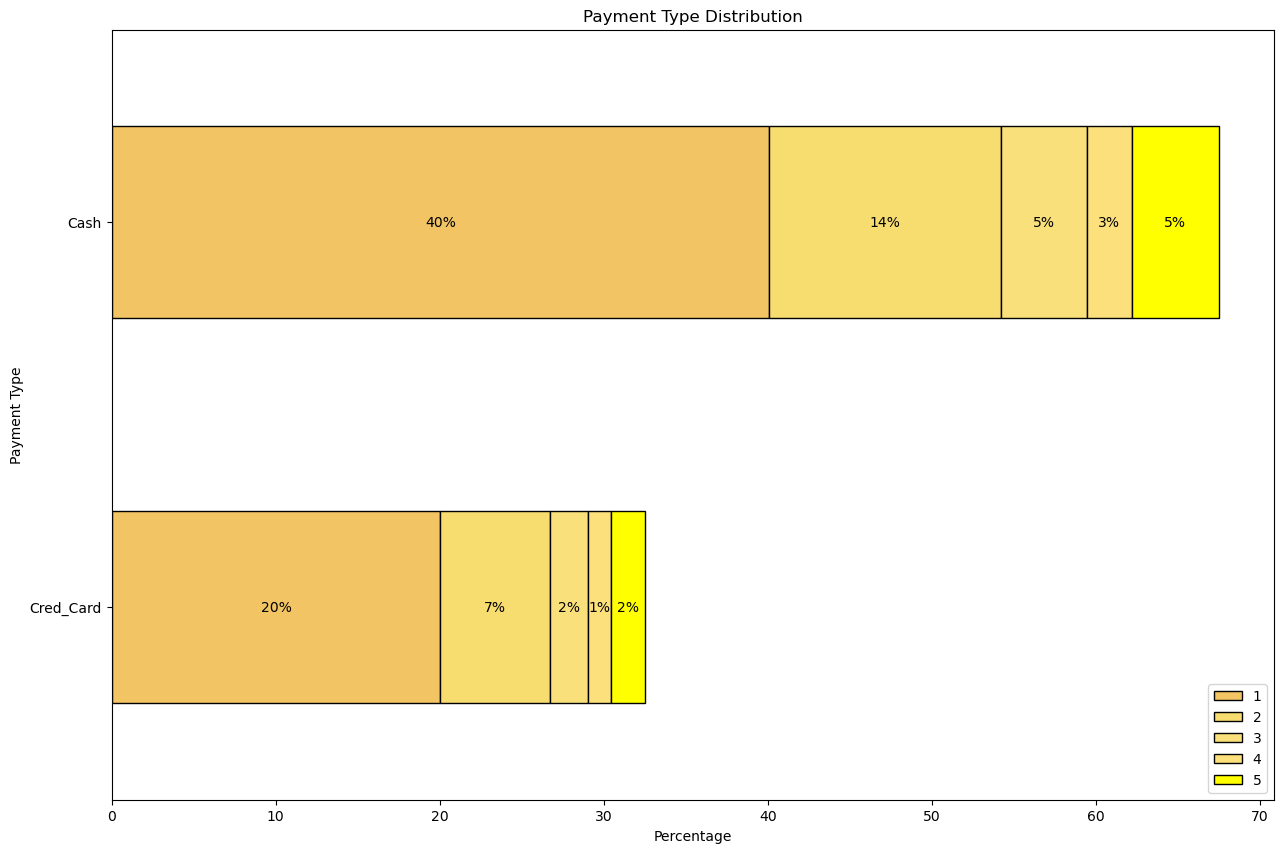

In [48]:
#creating a visalization
color_list=['#F2C464','#F7DC6F','#F9E07B','#FCE07C','#FFFF00'] #Color list from dark yellow to light yellow

fig, ax = plt.subplots(figsize=(15,10))
chart_df.plot(x='Payment_Type',kind='barh',ax=ax,color=color_list,stacked=True,edgecolor='Black')

for p in ax.patches:
   width= p.get_width()
   height= p.get_height()
   x, y = p.get_xy()
   ax.text(x+width / 2,
           y+height / 2,
           '{:.0f}%'.format(width),
           horizontalalignment='center', 
           verticalalignment='center')

plt.xlabel('Percentage')
plt.ylabel('Payment Type')
plt.title('Payment Type Distribution')
plt.legend(loc='lower right')
plt.show()

## Hypothesis Testing

__NULL HYPOTHESIS:__
- There is no difference in average fare between customers who use Credit Card or pay by Cash

__ALTERNATE HYPOTHESIS:__
- There is a difference in average fare between customers who use Credit card or pay by cash

Checking if the Data is Normally Distributed

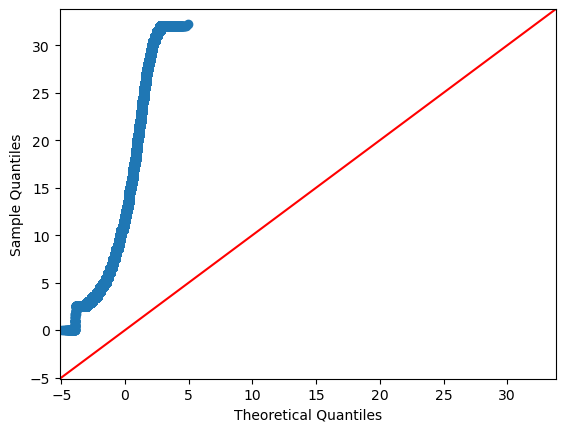

In [55]:
sm.qqplot(df['fare_amount'],line='45')
plt.show()

As the distribution is not aligned on the Diagonal Line, the data is not a Normal Distribution.

Taking in consideration, the facts :
- The Dataset is not small
- We dont know the Population Standard deviation

__We are going to perform T-test__

Taking the sample data of Payment by Card

In [57]:
Card_Sample = df[df['payment_type']=='Cred_Card']['fare_amount']

Taking the sample data of payment by Cash

In [58]:
Cash_Sample = df[df['payment_type']=='Cash']['fare_amount']

__Performing the T-test__

In [70]:
t_stats, P_value = st.ttest_ind(a=Card_Sample, b=Cash_Sample,equal_var=False)
print(f'The T-Statistic is: {t_stats},\nThe P_value is: {P_value}')

The T-Statistic is: 165.59915491544626,
The P_value is: 0.0


As the __T-Statistic Value__ is approximately __165__
and the __P_value__ is less than __0.05__

We can conclude that:
- The Null Hypothesis is rejected.
- The Alternate Hypothesis is accepted.

__It suggests that there is indeed a significant difference between average fare of the two payment types.__